In [2]:
#importing neccessary packages
#load librraries
from sklearn.ensemble import GradientBoostingRegressor
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import warnings
warnings.filterwarnings('ignore')


## Data Preparation

In [3]:
# get RF data as input data
boston=pd.read_csv("Gradient_boost_HousingData.csv")

X = boston.drop(columns =["MEDV"])

#dependence column - median value of house
y = boston["MEDV"]  
# viewing data- predictors
X.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21
6,0.08829,12.5,7.87,NaN,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5,311,15.2,386.63,29.93
9,0.17004,12.5,7.87,NaN,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.10


In [100]:
y[1:10] # response

1    21.6
2    34.7
3    33.4
4    36.2
5    28.7
6    22.9
7    27.1
8    16.5
9    18.9
Name: MEDV, dtype: float64

In [101]:
  from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')  # or 'median', 'most_frequent'
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

In [102]:
#split dataset into training set and test
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)  #80% traininmg and 20% testing

## Model training and evalution

In [103]:
#create gradentboost Regressor object
gradientregressor = GradientBoostingRegressor(max_depth=2, n_estimators=3, learning_rate=1.0)

In [104]:
#important Parameters
#n_estimators: Numbers of weak learners to train iteratively
#earning_rate: it contributes to the weight of the waek learners. it uses 1 as a default value.


In [105]:
#Train gradientboost Regressor
#model = gradientregressor.fit(X_train, y_train)

#predict the response for test dataset
#y_pred = model.predict(X_test)

from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingRegressor

model = HistGradientBoostingRegressor()
model.fit(X_train, y_train)  # This will accept NaNs
y_pred = model.predict(X_test)

In [106]:
r2_score(y_pred,y_test)

0.8745000332465683

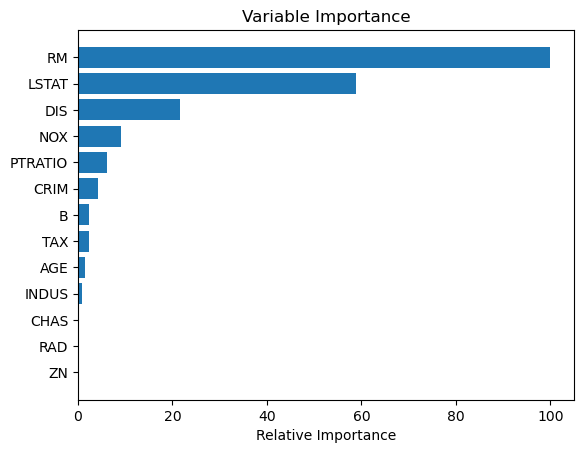

In [118]:
import matplotlib.pyplot  as plt
%matplotlib inline

# Replace with your actual column names
feature_names = X.columns  

# 1. Impute missing values (mean)
imputer = SimpleImputer(strategy='mean')
X_train_imp = imputer.fit_transform(X_train)
X_test_imp = imputer.transform(X_test)

# 2. Train GradientBoostingRegressor
model = GradientBoostingRegressor()
model.fit(X_train_imp, y_train)

# 3. Feature importance (relative to max)
feature_importance = 100.0 * (model.feature_importances_ / model.feature_importances_.max())

# 4. Sort and plot
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + 0.5

plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, np.array(feature_names)[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()


## Lets tune the hyperparameters

In [124]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV

pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('gbr', GradientBoostingRegressor())
])

LR = {'gbr__learning_rate':[0.15, 0.1, 0.05],
      'gbr__n_estimators': [100, 150, 200, 250]}

tuning = GridSearchCV(
    estimator=pipeline,
    param_grid=LR,
    scoring='r2'
)
tuning.fit(X_train, y_train)  # No need to impute manually

print(tuning.best_params_, tuning.best_score_)

{'gbr__learning_rate': 0.1, 'gbr__n_estimators': 200} 0.8317874294075775


## Similarly other hyperparameters like max_depth, split criteria, min no of leaf nodes etc can be tuned


## pros:
it iteratively corrects the mistakes of the weak, classifiers and improves accuracy 
by combining weak learners. 
Gives better accuracy in most of the cases


## Cons:
space and time completely.
Hyperparameter tuning